## Ashmal Vayani
### TSF Task1: Prediction using supervised ML

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [2]:
#Reading the data
scores_df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Visualizing and understanding the data

In [3]:
scores_df.shape

(25, 2)

In [4]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Checking for null values
scores_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
print(scores_df["Hours"].unique())
print(scores_df["Scores"].unique())

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86]


### Plotting through graphs

Text(0.5, 1.0, 'Barplot of Scores vs Hours')

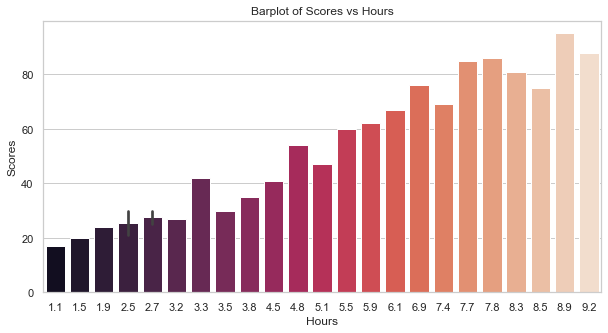

In [8]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
sns.barplot(x="Hours", y="Scores", data = scores_df, palette="rocket")
plt.title("Barplot of Scores vs Hours")

Text(0.5, 1.0, 'Countplot of Scores vs Hours')

<Figure size 504x360 with 0 Axes>

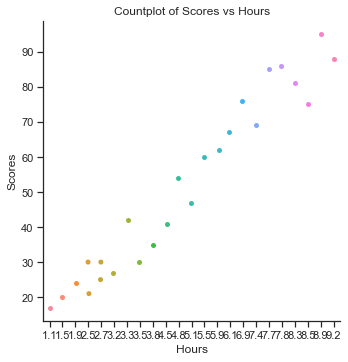

In [9]:
plt.figure(figsize=(7,5))
sns.set_theme(style = "ticks")
sns.catplot(x="Hours", y="Scores", data = scores_df, hue="Hours")
plt.title("Countplot of Scores vs Hours")

Text(0.5, 1.0, 'Violin of Scores vs Hours')

<Figure size 720x216 with 0 Axes>

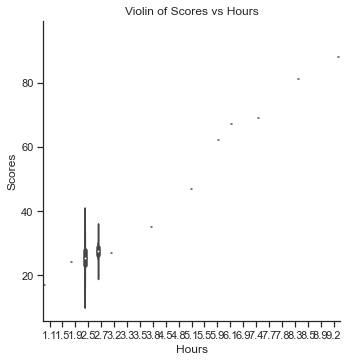

In [10]:
plt.figure(figsize=(10,3))
sns.set_theme(style = "ticks")
sns.catplot(x="Hours", y="Scores", data = scores_df, hue="Hours", kind="violin")
plt.title("Violin of Scores vs Hours")

In [11]:
corrmat = scores_df.corr()
corrmat

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

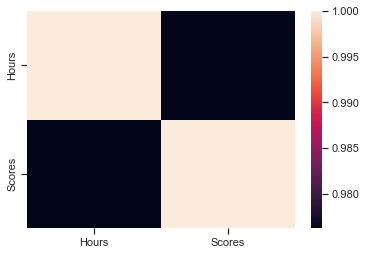

In [12]:
sns.heatmap(corrmat)

Text(0.5, 1.0, 'Scatterplot between Hours and Scores')

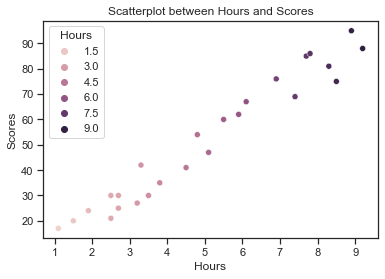

In [13]:
sns.scatterplot(x="Hours", y="Scores", data = scores_df, hue="Hours")
plt.title("Scatterplot between Hours and Scores")

Text(0.5, 1.0, 'Regplot between Hours and Scores')

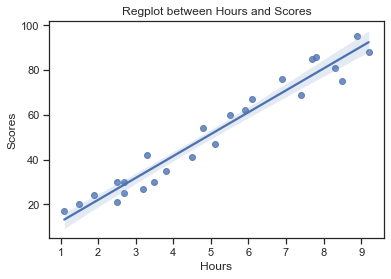

In [14]:
sns.regplot(x="Hours", y="Scores", data = scores_df)
plt.title("Regplot between Hours and Scores")

### Seperating the data

In [15]:
X = scores_df.drop("Scores", axis=1)
y= scores_df.Scores

In [16]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [17]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

## Modelling

In [18]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = LR.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [20]:
predictions = pd.DataFrame({"Actual_Value":y_test, "Predicted_Value":y_pred})
predictions.head()

,Actual_Value,Predicted_Value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Evaluation

In [21]:
r2_score = LR.score(X_test, y_test)
print("R2 score : ",r2_score)

R2 score :  0.9454906892105355


In [22]:
print("explained_variance_score : ",explained_variance_score(y_test, y_pred))

explained_variance_score :  0.9482829156738147


In [23]:
print("mean_absolute_error :",mean_absolute_error(y_test, y_pred)) 

mean_absolute_error : 4.183859899002975


In [24]:
#Prediction hours = 9.25
hours = 9.25
answer = LR.predict(np.array(hours).reshape(1,-1))
print("Number of Hours studied : {} ".format(hours))
print("Score obtained : {}".format(answer))

Number of Hours studied : 9.25 
Score obtained : [93.69173249]
